In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("../data/fraudTrain.csv")

In [4]:
pd.options.display.max_columns = None

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
category_values = df['category'].unique()
print(category_values)


['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']


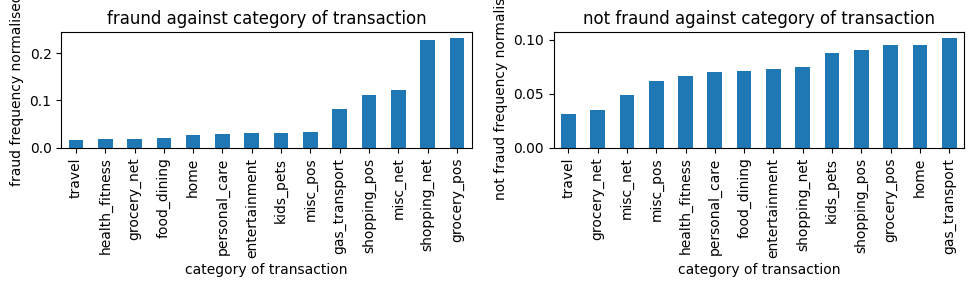

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)
plt.subplot2grid((3,3), (0,0))

# create a bar plot of the target class
df['category'][df['is_fraud']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('fraund against category of transaction')
plt.xlabel('category of transaction')
plt.ylabel('fraud frequency normalised')
plt.subplot2grid((3,3), (0,1))
df['category'][df['is_fraud']==0].value_counts(normalize=True, ascending=True).plot(kind='bar')

# set the title and axis labels
plt.title('not fraund against category of transaction')
plt.xlabel('category of transaction')
plt.ylabel('not fraud frequency normalised')



# display the plot
plt.show()

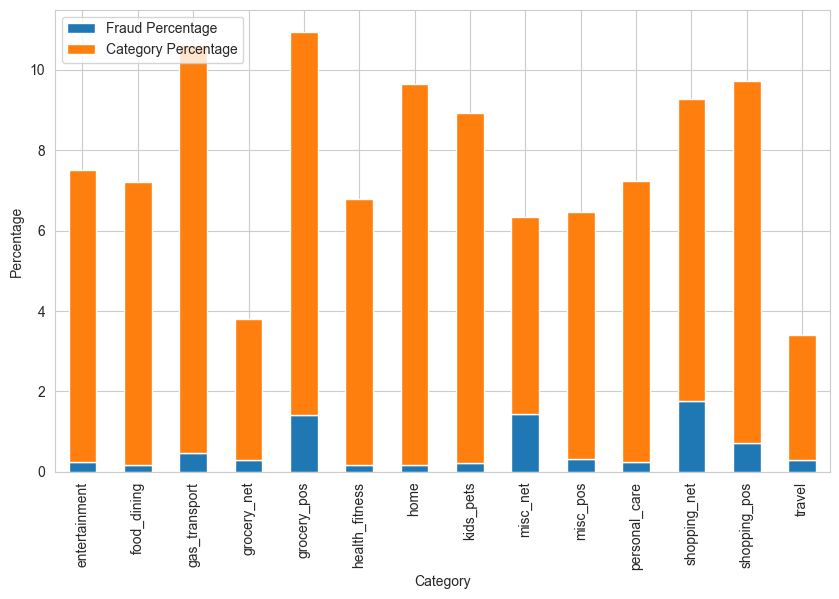

In [14]:
import seaborn as sns


# create a DataFrame with category and fraud columns
data = df[['category', 'is_fraud']]

# group by category and calculate the percentage of fraud
fraud_percentage = data.groupby('category').mean() * 100

# calculate the percentage of each category
category_percentage = data['category'].value_counts(normalize=True) * 100

# combine the two percentages into a new DataFrame
df_plot = pd.concat([fraud_percentage, category_percentage], axis=1)
df_plot.columns = ['Fraud Percentage', 'Category Percentage']

# create the stacked bar chart using seaborn
sns.set_style('whitegrid')
ax = df_plot.plot(kind='bar', stacked=True, figsize=(10, 6))

# set the x-axis and y-axis labels
ax.set_xlabel('Category')
ax.set_ylabel('Percentage')

# add a legend
ax.legend(loc='upper left')

# show the plot
plt.show()


In [15]:
job_values = df['category'].unique()
print(job_values)

['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']


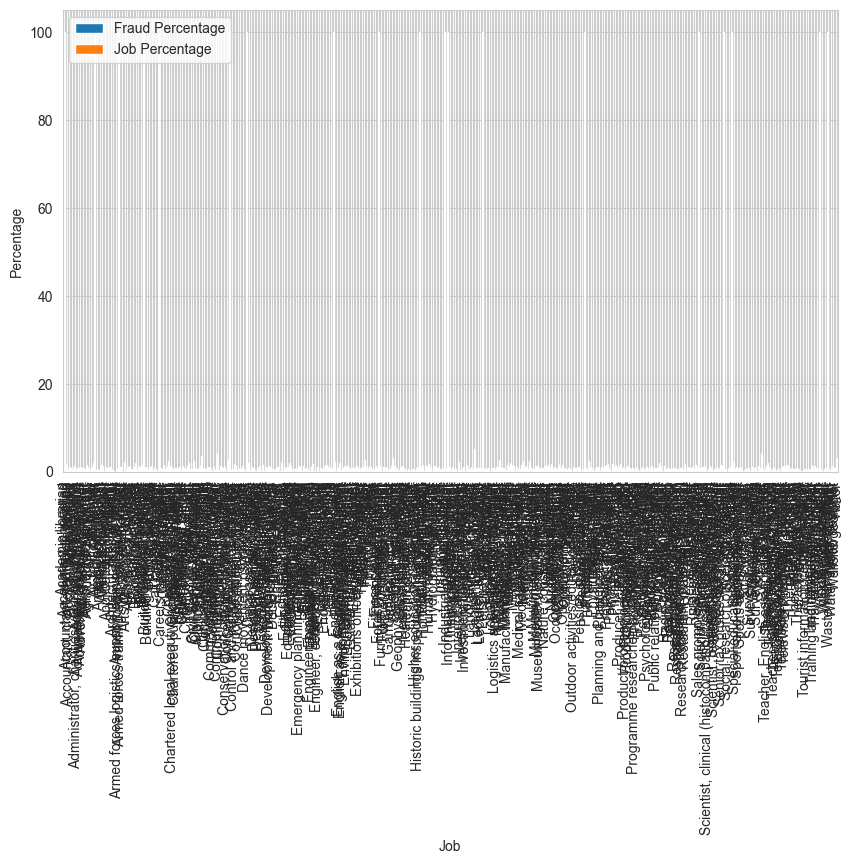

In [17]:

# create a DataFrame with category and fraud columns
data = df[['job', 'is_fraud']]

# group by category and calculate the percentage of fraud
fraud_percentage = data.groupby('job').mean() * 100

# calculate the percentage of each category
job_percentage = data['job'].value_counts(normalize=True) * 100

# combine the two percentages into a new DataFrame
df_plot = pd.concat([fraud_percentage, job_percentage], axis=1)
df_plot.columns = ['Fraud Percentage', 'Job Percentage']

# create the stacked bar chart using seaborn
sns.set_style('whitegrid')
ax = df_plot.plot(kind='bar', stacked=True, figsize=(10, 6))

# set the x-axis and y-axis labels
ax.set_xlabel('job')
ax.set_ylabel('Percentage')

# add a legend
ax.legend(loc='upper left')

# show the plot
plt.show()
